LogReg
{'0': {'precision': 0.8899705562481763, 'recall': 0.8826423234767968, 'f1-score': 0.8862912918862517, 'support': 38012.0}, '1': {'precision': 0.06766917293233082, 'recall': 0.009719222462203024, 'f1-score': 0.0169971671388102, 'support': 926.0}, '2': {'precision': 0.4227692307692308, 'recall': 0.4893859524148739, 'f1-score': 0.45364500792393025, 'support': 7019.0}, 'accuracy': 0.8049916226037382, 'macro avg': {'precision': 0.460136319983246, 'recall': 0.46058249945129126, 'f1-score': 0.452311155649664, 'support': 45957.0}, 'weighted avg': {'precision': 0.8020462534327794, 'recall': 0.8049916226037382, 'f1-score': 0.802697701646513, 'support': 45957.0}}
DecisionTree
{'0': {'precision': 0.8613717243610483, 'recall': 0.8405240450384089, 'f1-score': 0.8508201959948871, 'support': 38012.0}, '1': {'precision': 0.02335279399499583, 'recall': 0.03023758099352052, 'f1-score': 0.02635294117647059, 'support': 926.0}, '2': {'precision': 0.2925906600573963, 'recall': 0.3195611910528565, 'f1-

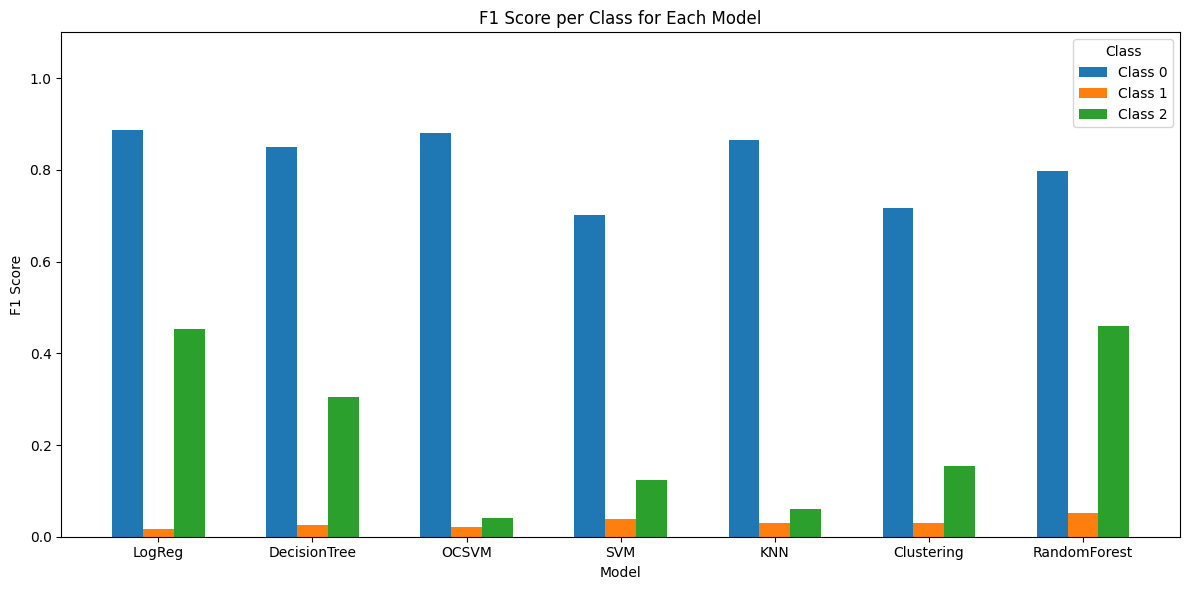

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
# Load predictions and ground truth
y_pred_lr = np.load("./results/y_pred_lr.npy").astype(int)
y_pred_dt = np.load("results/y_pred_dt.npy").astype(int)
y_pred_ocsvm = np.load("results/y_pred_ocsvm.npy").astype(int)
y_pred_svm = np.load("results/y_pred_svm.npy").astype(int)
y_pred_knn = np.load("results/y_pred_knn.npy").astype(int)
y_pred_cluster = np.load("results/y_pred_cluster.npy").astype(int)
y_pred_rf = np.load("results/y_pred_rf.npy").astype(int)
y_test = np.load("results/y_test.npy").astype(int)


# Model predictions
model_preds = {
    "LogReg": y_pred_lr,
    "DecisionTree": y_pred_dt,
    "OCSVM": y_pred_ocsvm,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn,
    "Clustering": y_pred_cluster,
    "RandomForest": y_pred_rf
}

class_labels = sorted(np.unique(y_test).astype(str))  # e.g., ['0', '1', '2']

# Store F1 scores per model and class
f1_scores = {model: [] for model in model_preds}

for model, preds in model_preds.items():
    report = classification_report(y_test, preds, output_dict=True, zero_division=0)
    print(model)
    print(report)
    for label in class_labels:
        f1_scores[model].append(report[label]["f1-score"])

# Plotting
model_names = list(f1_scores.keys())
n_models = len(model_names)
n_classes = len(class_labels)
bar_width = 0.2
x = np.arange(n_models)

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['tab:blue', 'tab:orange', 'tab:green']  # One color per class

for i, class_label in enumerate(class_labels):
    class_f1 = [f1_scores[model][i] for model in model_names]
    ax.bar(x + i * bar_width, class_f1, width=bar_width, label=f"Class {class_label}", color=colors[i])

# Styling
ax.set_xlabel("Model")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score per Class for Each Model")
ax.set_xticks(x + bar_width)
ax.set_xticklabels(model_names)
ax.set_ylim(0, 1.1)
ax.legend(title="Class")
plt.tight_layout()
plt.show()
